In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import json 
import requests
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [0]:
with open("/content/drive/My Drive/Colab Notebooks/dane.json", 'r') as jason: ################ kod glowny #########################
    patents = json.load(jason)

In [49]:
patents[:1]

[{'abstract': '\\r\\r\\rCROSS-REFERENCE TO RELATED APPLICATIONS\\rThis application is a divisional of application Ser. No. 09/855,262, filed May 15, 2001, now U.S. Pat. No. 6,530,126.\\r\\r\\r\\r\\rBACKGROUND OF THE INVENTION\\r1. Field of Invention\\rThe present invention relates generally to a low thread force two piece cable tie. More particularly, the invention relates to a locking device for such a cable tie that has an integral protruding tang serving as an anchoring device.\\r2. Description of Related Art\\rPlastic cable ties having metal locking device inserts are well known in the art. Examples of such include U.S. Pat. No. 3,457,598 to Mariani and U.S. Pat. No. 5,517,727 to Bernard et al.\\rCable ties of this type include a metal locking device partially embedded at an angle within a strap accepting channel of a cable tie head. The metal locking device is situated at an angle that allows insertion of a cable tie strap in an insertion direction, but allows for engagement of th

In [0]:
abstract_key='description'

In [0]:
i=0
a=0
b=0
ilosc_slow=[]
for p in patents:
    #print(i,distro['classification']['main'][0:4], len(distro['abstract'].split()) ) #Pierwsze cztery litery klasyfikacji. Liczba słów w abstract.
    ilosc_slow.append(len(p[abstract_key].split()) )
    if (p['classification']['main'][0:4] == 'A61M'):
        a=a+1
    elif(p['classification']['main'][0:4] == 'B65D'):
        b=b+1
    i=i+1

In [52]:
#AD.EDA
#1.
ilosc=len(patents) #Ilość patentów 11433.
print("Ilość patentów równa się", ilosc)

#2.
#dane[:0] # JSON składa się z 7 kolumn. 

#3.
a+b - len(patents) #Zostały zliczone wszytkie główne kody 4 cyfrowe poprawnie.
print("Liczebność klas:", a, ',', b,". Klasy nie są równoliczne") #Klasy 'A61M' jest więcej o 565. (Klasy nie są równoliczne).

Ilość patentów równa się 11433
Liczebność klas: 5434 , 5999 . Klasy nie są równoliczne


In [53]:
print(ilosc_slow) #Ilość słów w abstrakcie patentu

[1465, 1098, 953, 3444, 460, 701, 359, 459, 1878, 895, 1116, 423, 811, 443, 790, 964, 508, 2006, 1144, 1285, 681, 833, 1197, 2363, 3070, 990, 1482, 3558, 659, 819, 3320, 644, 1316, 638, 277, 3596, 1405, 1088, 1451, 1068, 1013, 1199, 678, 1953, 3162, 2929, 1095, 2411, 693, 1046, 1254, 862, 646, 1673, 972, 1164, 3687, 1132, 3312, 1181, 928, 1976, 1282, 540, 1592, 575, 1922, 1247, 1372, 769, 401, 961, 1378, 946, 1485, 1710, 1561, 977, 758, 1543, 61, 717, 1955, 578, 694, 1121, 216, 1372, 801, 1144, 1067, 1498, 544, 596, 1297, 1047, 1154, 1117, 1092, 816, 500, 335, 1013, 628, 2719, 862, 1016, 1938, 1745, 2541, 1318, 335, 731, 4813, 494, 2388, 2037, 1178, 1705, 1364, 218, 516, 1464, 1485, 973, 898, 1333, 2337, 1851, 1498, 1434, 1871, 1589, 1238, 842, 1105, 3181, 4151, 1115, 791, 736, 1288, 1745, 957, 1221, 775, 816, 884, 713, 3508, 1744, 1316, 588, 895, 425, 1546, 1946, 788, 1021, 813, 2545, 576, 1623, 1394, 1357, 1976, 1416, 655, 998, 4336, 287, 2409, 1173, 529, 878, 526, 884, 751, 2001, 21

In [0]:
sr=np.mean(ilosc_slow)
med=np.median(ilosc_slow)

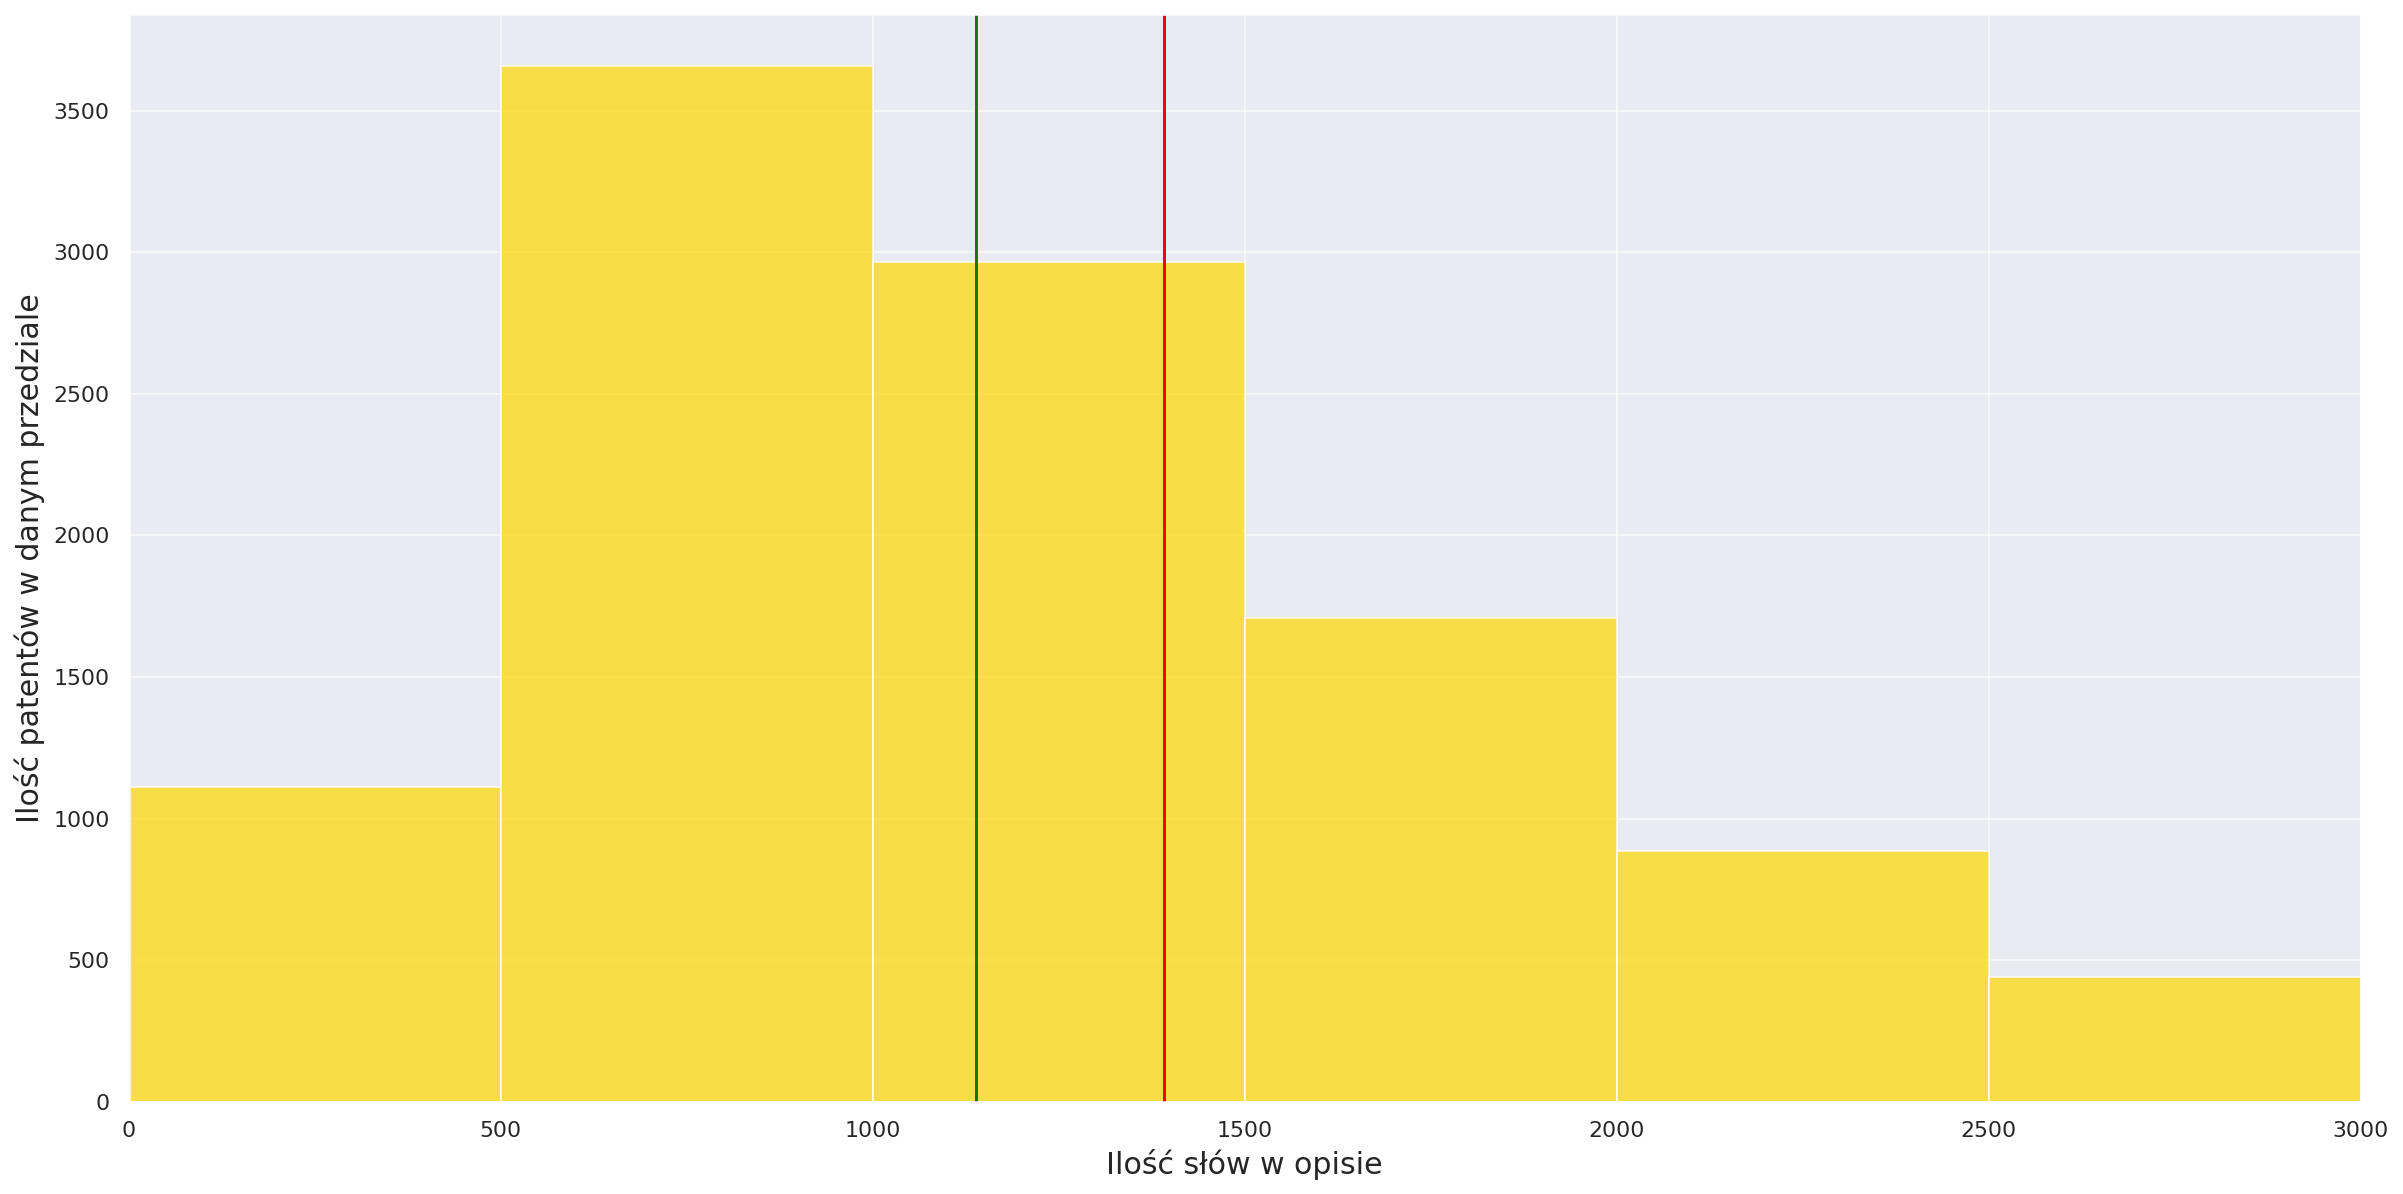

In [55]:
plt.figure(figsize=(20,10))
plt.hist(ilosc_slow, ls='-', bins=[0, 500, 1000, 1500, 2000, 2500, 3000], color='gold',alpha=0.7)
plt.xlabel("Ilość słów w opisie", fontsize=15)
plt.ylabel("Ilość patentów w danym przedziale", fontsize=15)
plt.axis(option='on', col='red')
plt.xlim(0,3000)
plt.axvline(x=sr, c='red')
plt.axvline(x=med, c='green')
plt.grid(alpha=100)
plt.show()

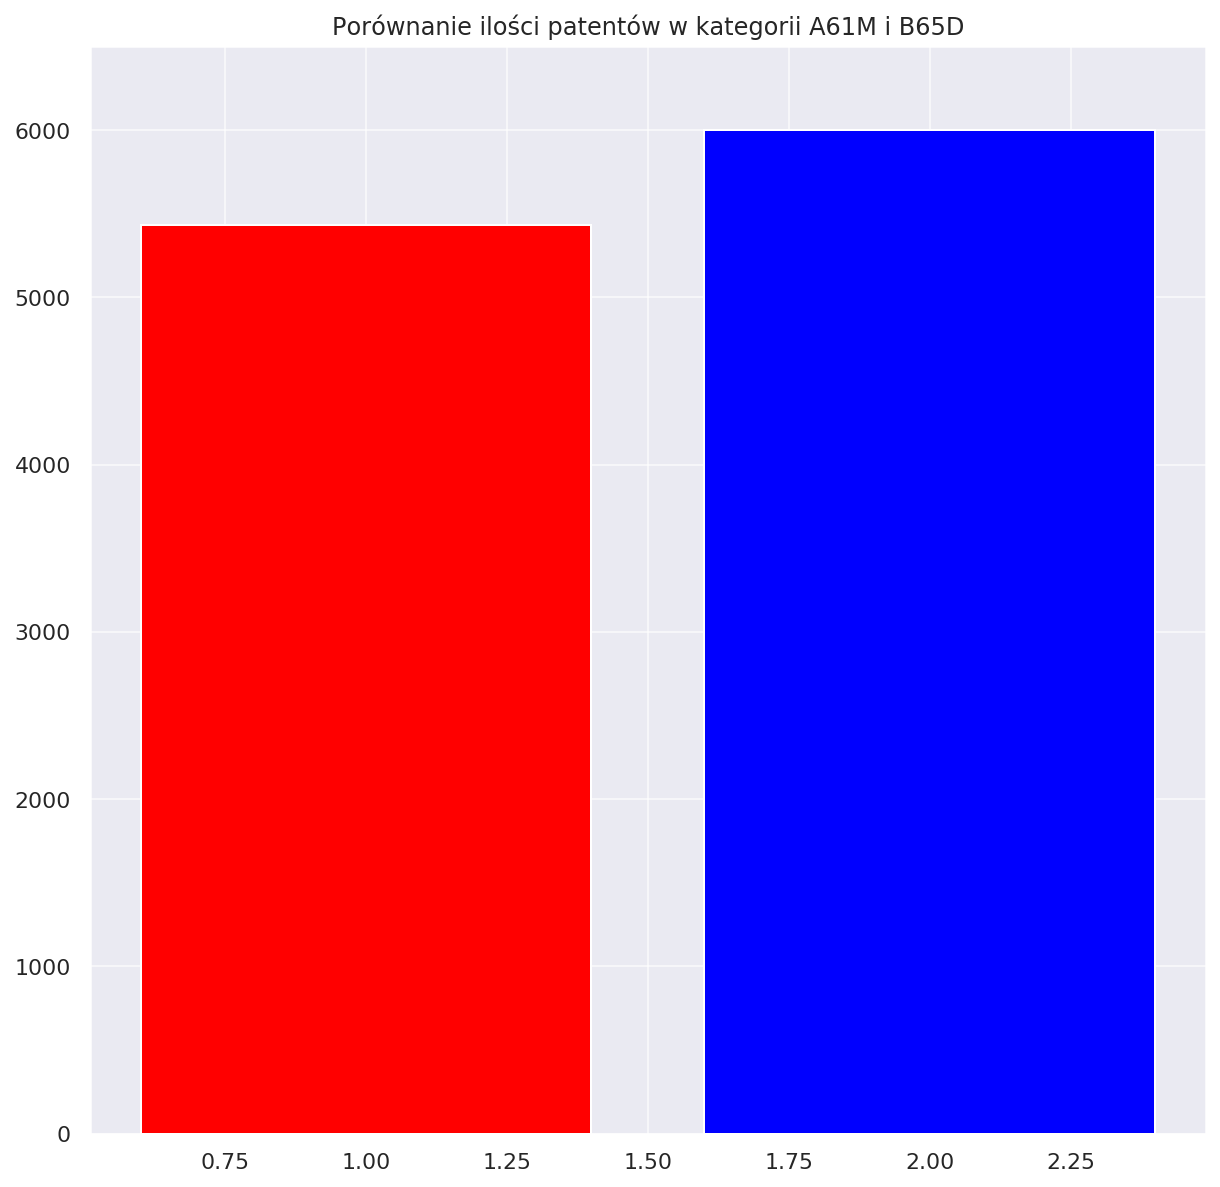

In [56]:
plt.figure(figsize=(10,10))
plt.ylim((0,6500))
plt.grid(alpha=100)
plt.bar((1,2),(5434, 5999), color=('red','blue'))
plt.title("Porównanie ilości patentów w kategorii A61M i B65D")
plt.show()

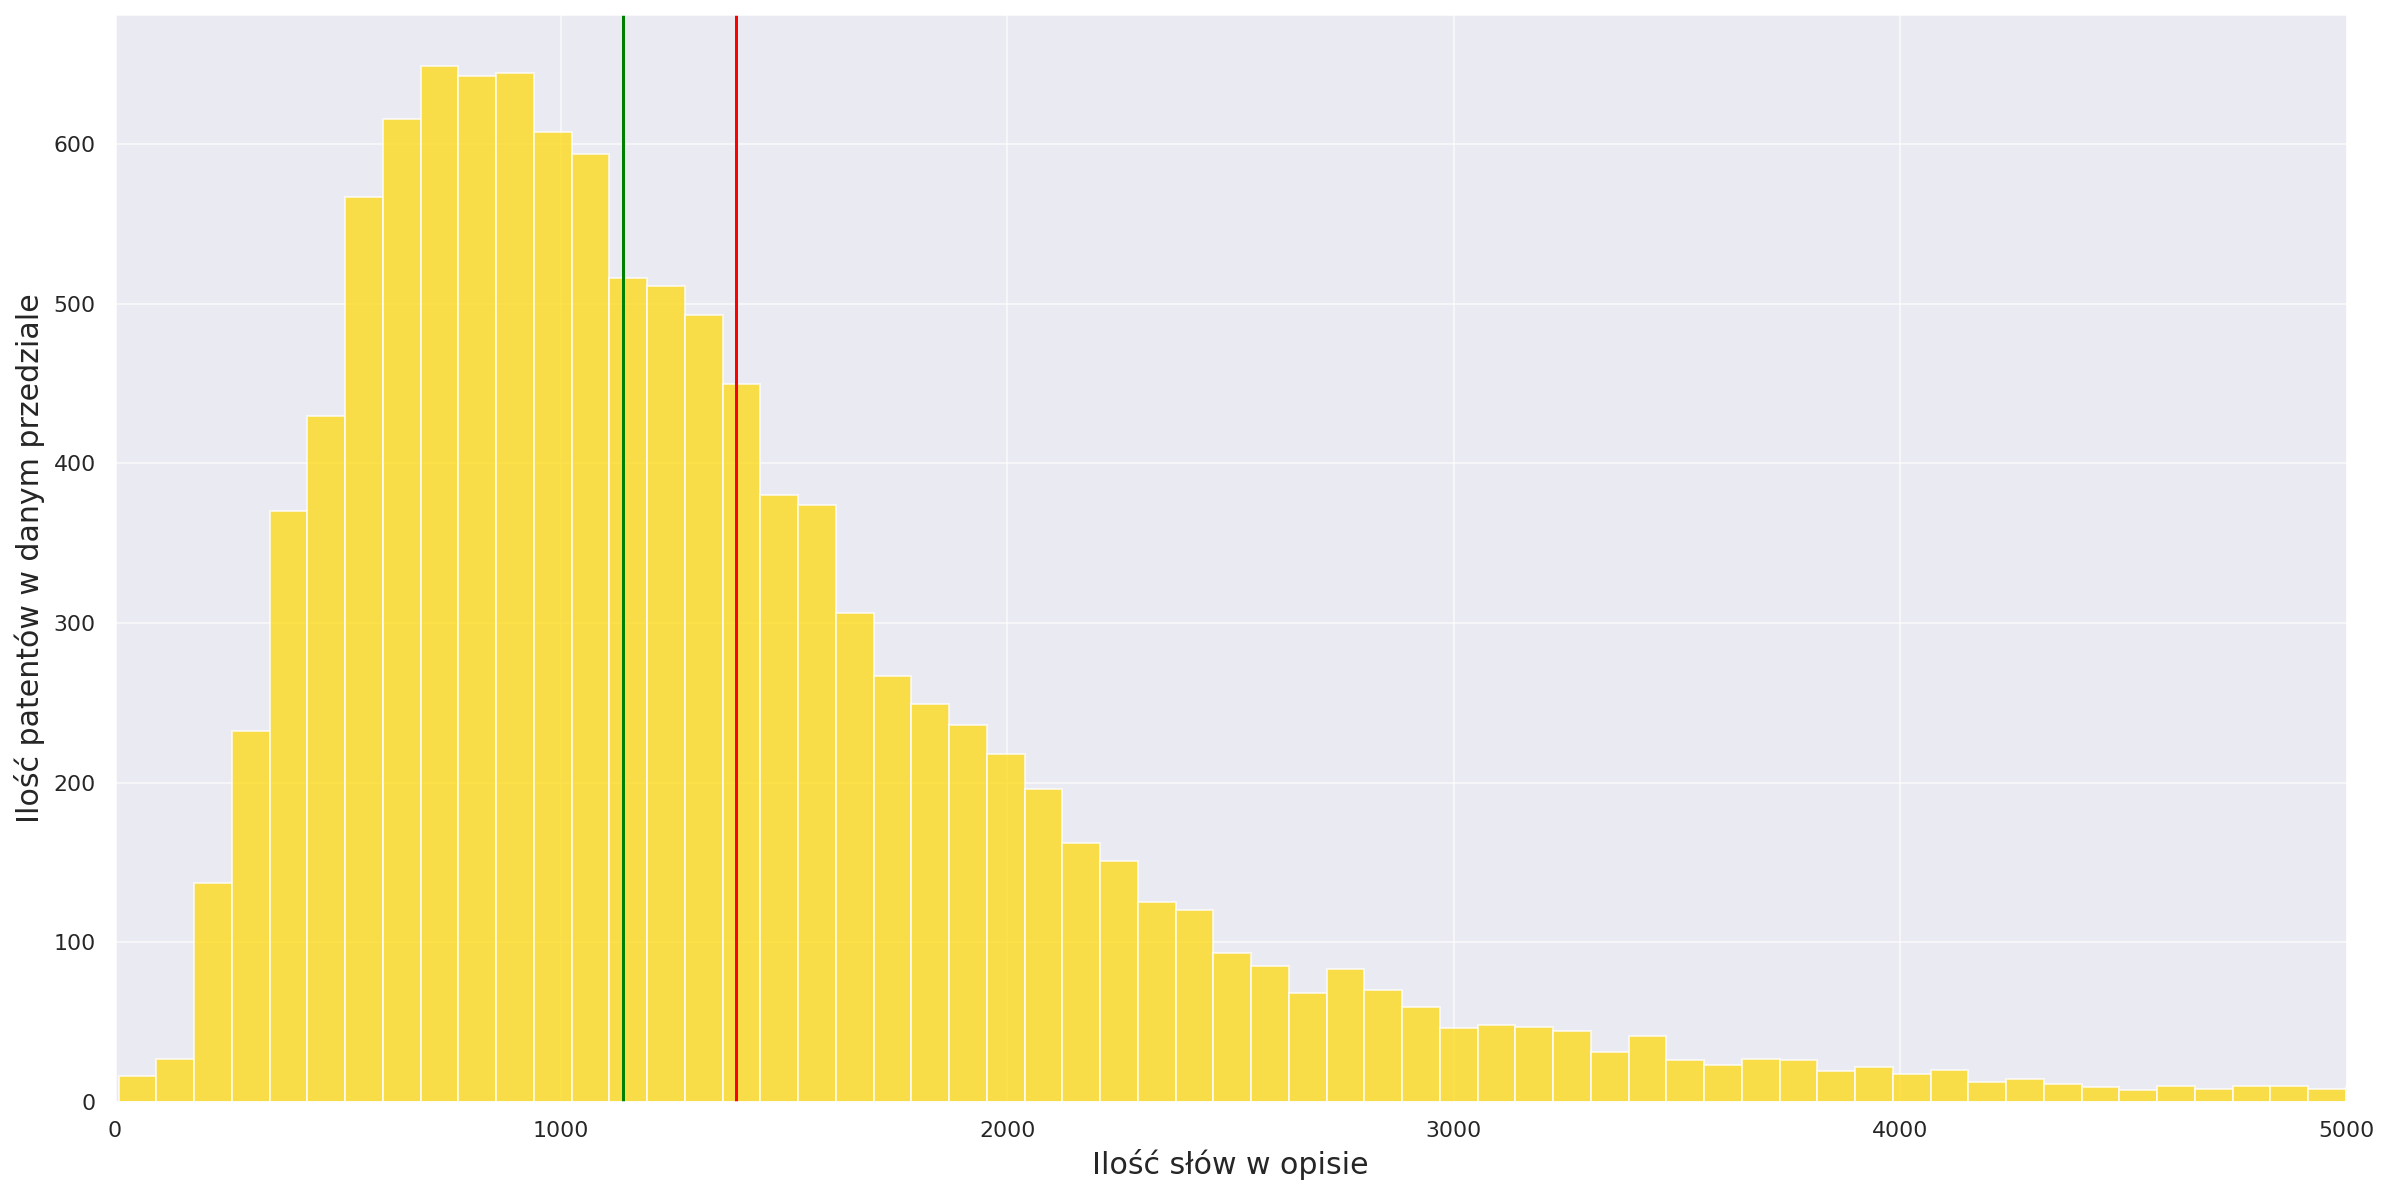

In [57]:
plt.figure(figsize=(20,10))
plt.hist(ilosc_slow, ls='-', color='gold', alpha=0.7, bins='auto')
plt.xlabel("Ilość słów w opisie", fontsize=15)
plt.ylabel("Ilość patentów w danym przedziale", fontsize=15)
plt.axis(option='on', col='red')
plt.xlim(0,5000)
plt.axvline(x=sr, c='red')
plt.axvline(x=med, c='green')
plt.grid(alpha=100)

plt.show()

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import os

In [59]:
labels = []
for p in patents:
    c = p['classification']['main'][0:4]
    if c=='A61M':
      labels.append([1,0])
    else:
      labels.append([0,1])
labels[0:5]

[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]

In [0]:
abstracts = [p[abstract_key] for p in patents]

In [0]:
t  = Tokenizer()
t.fit_on_texts(abstracts) #Biblioteka słów na wektory.

In [0]:
sequences = t.texts_to_sequences(abstracts)

In [0]:
word_index=t.word_index

In [64]:
word_index

{'the': 1,
 'of': 2,
 'a': 3,
 'to': 4,
 'and': 5,
 'is': 6,
 'in': 7,
 'for': 8,
 'or': 9,
 'be': 10,
 'an': 11,
 'with': 12,
 'invention': 13,
 'that': 14,
 'which': 15,
 'as': 16,
 'are': 17,
 'from': 18,
 'by': 19,
 'at': 20,
 'may': 21,
 'such': 22,
 'it': 23,
 'can': 24,
 'on': 25,
 'this': 26,
 'container': 27,
 'one': 28,
 'present': 29,
 'end': 30,
 'portion': 31,
 'into': 32,
 'device': 33,
 'first': 34,
 'catheter': 35,
 'has': 36,
 'second': 37,
 'other': 38,
 'when': 39,
 'body': 40,
 'through': 41,
 'having': 42,
 'blood': 43,
 'patient': 44,
 'member': 45,
 'also': 46,
 'not': 47,
 'provide': 48,
 'fluid': 49,
 'needle': 50,
 'used': 51,
 'pressure': 52,
 'use': 53,
 'surface': 54,
 'have': 55,
 'another': 56,
 'wall': 57,
 'material': 58,
 'between': 59,
 'no': 60,
 'more': 61,
 'within': 62,
 'side': 63,
 'means': 64,
 'flow': 65,
 'further': 66,
 'includes': 67,
 'tube': 68,
 'system': 69,
 'so': 70,
 's': 71,
 'distal': 72,
 'each': 73,
 'opening': 74,
 'least': 75,


In [0]:
data=pad_sequences(sequences, maxlen=100)

In [0]:
def split_data(data, labels, split):
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    data = data[indices]
    labels = labels[indices]
    nb_validation_samples = int(split * data.shape[0])

    x_train = data[:-nb_validation_samples]
    y_train = labels[:-nb_validation_samples]
    x_val = data[-nb_validation_samples:]
    y_val = labels[-nb_validation_samples:]
    return x_train, y_train, x_val, y_val

In [0]:
def train_test_data(split):
    return split_data(data, np.array(labels), split), word_index

In [0]:
TAKE_FIRST=11433

In [69]:

(x_train, y_train, x_val, y_val), word_index = train_test_data(0.5)

print('Shape of data tensor:', x_train.shape, x_val.shape)
print('Shape of label tensor:', y_train.shape, y_val.shape)

Shape of data tensor: (5717, 100) (5716, 100)
Shape of label tensor: (5717, 2) (5716, 2)


In [70]:
type(data)

numpy.ndarray

In [0]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, GlobalMaxPool1D, LSTM
from keras.metrics import categorical_accuracy

In [0]:
from pathlib import Path

def embedding_matrix(word_index):
    dim = 300
    print("Loading GloVe word vectors...")
    embeddings_index = {}
    with open("/content/drive/My Drive/Colab Notebooks/glove.42B.300d.txt") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
            
    print('Found %s word vectors.' % len(embeddings_index))
    
    embedding_matrix = np.zeros((len(word_index) + 1, dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [73]:
EMBEDDING_DIM = 300
em = embedding_matrix(word_index)

Loading GloVe word vectors...
Found 1917494 word vectors.


In [0]:
from keras.layers import Embedding

def embedding_layer(x_train, word_index):
    return Embedding(len(word_index) + 1,
                     EMBEDDING_DIM,
                     weights=[em],
                     input_length=x_train.shape[1],
                     trainable=False)

In [0]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, GlobalMaxPool1D, LSTM
from keras.metrics import categorical_accuracy

In [0]:
import keras.backend as K
def sum_binary_crossentropy(y_true, y_pred):
    return K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)

In [0]:
def model3(embedding, n_cats):
    model = Sequential()
    model.add(embedding)
    model.add(Dropout(0.2))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(GlobalMaxPool1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(n_cats, activation='sigmoid'))

    model.compile(loss=sum_binary_crossentropy, # "binary_crossentropy",
                  optimizer='adam',
                  metrics=[categorical_accuracy])
    print(model.summary())
    return model

In [78]:
model = model3(embedding_layer(x_train, word_index), y_train.shape[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 300)          22353300  
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 300)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 98, 128)           115328    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 22,485,398
Trainable params: 132,098
Non-trainable params: 22,353,300
____________________________________

In [79]:
model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=10, batch_size=32)

Train on 5717 samples, validate on 5716 samples
Epoch 1/10
5717/5717 [==============================] - 11s 2ms/step - loss: 0.6232 - categorical_accuracy: 0.8657 - val_loss: 0.3712 - val_categorical_accuracy: 0.9288
Epoch 2/10
5717/5717 [==============================] - 11s 2ms/step - loss: 0.3578 - categorical_accuracy: 0.9286 - val_loss: 0.3544 - val_categorical_accuracy: 0.9326
Epoch 3/10
5717/5717 [==============================] - 11s 2ms/step - loss: 0.2918 - categorical_accuracy: 0.9405 - val_loss: 0.3332 - val_categorical_accuracy: 0.9363
Epoch 4/10
5717/5717 [==============================] - 11s 2ms/step - loss: 0.1965 - categorical_accuracy: 0.9669 - val_loss: 0.3558 - val_categorical_accuracy: 0.9391
Epoch 5/10
5717/5717 [==============================] - 11s 2ms/step - loss: 0.1337 - categorical_accuracy: 0.9745 - val_loss: 0.3527 - val_categorical_accuracy: 0.9398
Epoch 6/10
5717/5717 [==============================] - 11s 2ms/step - loss: 0.0790 - categorical_accuracy:

# Validation

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import pandas as pd
import numpy as np
import os

sns.set(color_codes=True)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
def total_recall_precision(p, y, t):
    p_mask = np.zeros_like(p).astype(bool)
    y_mask = y.astype(bool)
    p_mask[p >= t] = True
    p = np.sum(p_mask & y_mask)
    n = np.sum(p_mask & ~y_mask)
    true = np.sum(y_mask)
    return (p/true, p/(p+n) if p+n>0 else 0)

def plot_total_recall_precision(model, x, y):
    pred = model.predict(x)
    ts = np.linspace(0, 1, 50)
    recall, prec = zip(*[total_recall_precision(pred, y, t) for t in ts])
    plt.plot(ts, recall, label="recall")
    plt.plot(ts, prec, label="precission")
    plt.legend()
    plt.show()

In [0]:
pred_val = model.predict(x_val)

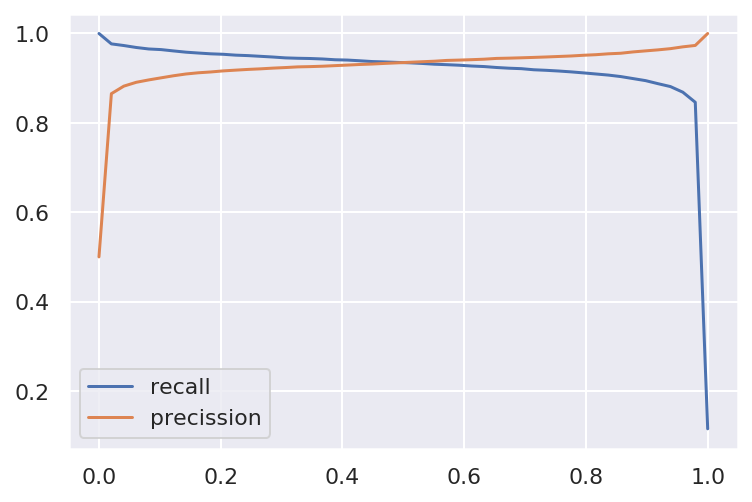

In [90]:
plot_total_recall_precision(model, x_val, y_val)

In [91]:
pred_val[0]

array([1.758337e-06, 9.999987e-01], dtype=float32)

In [92]:
x_val[0]

array([  686,     1,  1787,   603,     3,   451,   184,   609,    16,
          11,   585,   162,  6366,     1,   117,   153,     3,   595,
         241,   451,  1133,   249,  5751,     4,     1,   110,   153,
        2629,    12,     1,   451,   184,     4,   162,  2995,     1,
        1787,   603,     5,     3,   451,  3009,  2290,     7,     1,
         110,   153,     1,  3823,   579,   461,  2163,  1787,    27,
          15,     6,  1922,    12,     3,   451,  1133,     8,  2836,
          11, 27603,   603,    21,    66,   145,     3,    37,   451,
         184,   609,    16,    11,   585,     7,     1,   117,   153,
           1,   451,   184,     5,     1,   595,   241,   451,  1133,
          21,    10,  2402,     2,     3,  5521,  1680,   461,  1983,
          58], dtype=int32)

In [93]:
y_val[0]

array([0, 1])